In [14]:
#1D non-isothermal

'''
 - 
'''

from scipy.integrate import solve_bvp
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def heats(T):
    #heats of reaction and heat capacity calculation from NIST
    t = T/1000

    #CH4
    A =	-0.703029
    B =	108.4773
    C =	-42.52157
    D =	5.862788
    E =	0.678565
    F =	-76.84376
    G =	158.7163
    H =	-74.87310

    dH_CH4 = A*t + B*t**2/2 + C*t**3/3 + D*t**4/4 - E/t + F - H
    Cp_CH4 = A + B*t + C*t**2 + D*t**3 + E/(t**2)

    #H2O
    A =   30.09200
    B =   6.832514
    C =   6.793435
    D =  -2.534480
    E =   0.082139
    F =  -250.8810
    G =   223.3967
    H =  -241.8264

    dH_H2O = A*t + B*t**2/2 + C*t**3/3 + D*t**4/4 - E/t + F - H
    Cp_H2O = A + B*t + C*t**2 + D*t**3 + E/(t**2)

    #CO
    A =   25.56759
    B =   6.096130
    C =   4.054656
    D =  -2.671301
    E =   0.131021
    F =  -118.0089
    G =   227.3665
    H = -110.5271

    dH_CO = A*t + B*t**2/2 + C*t**3/3 + D*t**4/4 - E/t + F - H
    Cp_CO = A + B*t + C*t**2 + D*t**3 + E/(t**2)

    #CO2
    A =   24.99735
    B =   55.18696
    C =  -33.69137
    D =   7.948387
    E =  -0.136638
    F =  -403.6075
    G =   228.2431
    H =  -393.5224

    dH_CO2 = A*t + B*t**2/2 + C*t**3/3 + D*t**4/4 - E/t + F - H
    Cp_CO2 = A + B*t + C*t**2 + D*t**3 + E/(t**2)

    #H2
    A =  33.066178
    B = -11.363417
    C =  11.432816
    D = -2.772874
    E = -0.158558
    F = -9.980797
    G =  172.707974
    H =  0.0

    dH_H2 = A*t + B*t**2/2 + C*t**3/3 + D*t**4/4 - E/t + F - H
    Cp_H2 = A + B*t + C*t**2 + D*t**3 + E/(t**2)

    #Ar
    A =	20.78600
    B =	2.825911*10**-7
    C =	-1.464191*10**-7
    D =	1.092131*10**-8
    E =	-3.661371*10**-8
    F =	-6.197350
    G =	179.9990
    H =	0

    dH_Ar = A*t + B*t**2/2 + C*t**3/3 + D*t**4/4 - E/t + F - H
    Cp_Ar = A + B*t + C*t**2 + D*t**3 + E/(t**2) #J/mol K

    dHsmr = (3*dH_H2 + dH_CO - dH_CH4 - dH_H2O + 206.1)*10**3 #J/mol
    dHwgs = (dH_H2 + dH_CO2 - dH_CO - dH_H2O - 41.15)*10**3 #J/mol
    # print(dHsmr)
    # print(dHwgs)
    # print([Cp_CH4, Cp_H2O, Cp_CO, Cp_CO2, Cp_H2])
    return dHsmr, dHwgs, [Cp_CH4, Cp_H2O, Cp_CO, Cp_CO2, Cp_H2, Cp_Ar], [dH_CH4, dH_H2O, dH_CO, dH_CO2, dH_H2, dH_Ar]

In [16]:
#WANT TO RE-ARANGE CONSTANTS

#reactor constant
L = 0.0609 #m
R_inner = 0.00225 #m outside radius of inner tube
R_outer = 0.0035 #m inside radius of outer tube
Rin_outer = 0.003154/2 #m inner radius of inner tube

A = np.pi * ((R_outer)**2-(R_inner)**2) #m^2 AXIAL AREA (GAS FLOW)
V = A*L #m^3
Perimout = 2*np.pi*R_outer
Souter = Perimout*L #m^2 RADIAL AREA (HEAT FLUX AND REACTION)

Ain = np.pi * (Rin_outer)**2
Vin = Ain*L
Perimin = 2*np.pi*R_inner
Sinner = Perimin*L #m^2 inner RADIAL AREA (HEAT FLUX)

print(A)
print(Ain)

h2Removal = 0 #change to 1 if there is removal of hydrogen

#gas flow constants WHEN CHANGING THE TEMPERATURE YOU NEED TO ADJUST THE INITIAL GUESS -- USING ODEINT MIGHT BE FOR BETTER CONVERSION
Tin = 450 #K
P = 3 #bar or atm
Rgas = 8.3144598 * 10**-5

sccm0 = np.array([16.16, 43.04, 0, 0, 9, 3.49])
mols0 = sccm0/22400 / 60 #* 273.15 / 298 # * P / 1
boundary = np.concatenate((mols0, [Tin]))
print(boundary)

#rate equation constants
Rreact = 8.314 #J / mol·K
Easmr = 165.740 #kJ/mol
Asmr = 1.68*10**8
Eawgs = 89.23 #kJ/mol
Awgs = 9.90*10**3

Ku = 0.6

I = 9 #curent in Amps
F = 96485 #faradays constant

Uouter = 20 #J (s K m2)^-1.     Uouter = 0.116/Souter
Ts = 298 #K
q_inner = 1000 #w/m2

q_furn = 18000 #W/m2 #16000*Souter #J/s  q_furn= 2

print(q_furn/Souter)
print(Souter*Uouter*(-1050 + Ts))
print(q_furn + Uouter*(-1050 + Ts))
MM = np.array([16.04, 18.01528, 28.01, 44.009, 2.016, 39.948])
m0 = np.dot(MM, mols0)
print(f'{m0*10**-3:.3e} kg/s') #kg/s


2.2580197197676646e-05
7.812917876399411e-06
[1.20238095e-05 3.20238095e-05 0.00000000e+00 0.00000000e+00
 6.69642857e-06 2.59672619e-06 4.50000000e+02]
13440248.536965122
-20.14248466130895
2960
8.870e-07 kg/s


In [17]:
x_num = 10000
dz = 2*L/(x_num-1)

x_pts = np.linspace(-L,L,x_num)

#initial guess array
init_guess = np.zeros((7, x_num))
init_guess[0, :] = boundary[0]
init_guess[1, :] = boundary[1]
init_guess[2, :] = boundary[2]
init_guess[3, :] = boundary[3]
init_guess[4, :] = boundary[4]  
init_guess[5, :] = boundary[5]
init_guess[6, :] = boundary[6]

def odes(x, F): #dy/dt = f(x)
    F[:6, :][F[:6, :] < 0] = 0
    y = F[:6]/np.sum(F[:6], axis = 0)
    T = F[6]
    Ctot = P/(Rgas * T)

    hnx = int(len(T)/2)
    if len(T) % 2 != 0:
        endnx = len(T)-1
    else:
        endnx = len(T)
    # print(len(T))
    # print(hnx)
    # print(endnx)

    global vfinal
    vfinal = [np.sum(F[:6,:hnx]/Ain, axis = 0)/Ctot[:hnx], np.sum(F[:6,hnx:]/A, axis = 0)/Ctot[hnx:]] #m3/sec

    Keqsmr = (101325/100000)**2 * np.exp(-26830/T + 30.114)
    Keqwgs = np.exp(4400/T - 4.036)

    rsmr = np.full(len(y[0]), 0) #2*np.pi*R_outer/A*Ku*Asmr*np.exp(-Easmr*1000/Rreact/T)*(y[0]*y[1]-(P**2)*y[2]*(y[4]**3)/Keqsmr) #
    rsmr[:hnx] = 0
    rwgs = np.full(len(y[0]), 0) #2*np.pi*R_outer/A*Ku*Awgs*np.exp(-Eawgs*1000/Rreact/T)*(y[1]*y[2]-y[3]*y[4]/Keqwgs) #
    rwgs[:hnx] = 0
    #rh2r = I/(2*F*L) #have not confirmed if this is correct

    dHsmr, dHwgs, Cps, _ = heats(T)

    Cpg = np.sum(y[:6, :]*Cps, axis=0)

    ch4 = (-rsmr)*A #2*np.pi*R_outer #change this back to A if breaking
    h2o = (-rsmr - rwgs)*A #2*np.pi*R_outer
    co = (rsmr - rwgs)*A #2*np.pi*R_outer
    co2 = (rwgs)*A #2*np.pi*R_outer
    h2 = (3*rsmr + rwgs)*A #2*np.pi*R_outer      # + h2Removal*rh2r
    ar = np.zeros(len(T))
    # print(len(T[hnx:endnx]))
    # print(len(T[:hnx][::-1]))
    Temp = np.zeros(len(T))
    Temp[hnx:endnx] = (Perimout*Uouter*(-T[hnx:endnx] + Ts) - A*(dHsmr[hnx:endnx]*rsmr[hnx:endnx] + dHwgs[hnx:endnx]*rwgs[hnx:endnx]) 
                       + q_furn*Perimout + Perimin*q_inner)/(np.sum(F[:6,hnx:endnx], axis = 0)*Cpg[hnx:endnx]) #
    Temp[:hnx] = q_inner*Perimin /(np.sum(F[:6,:hnx], axis = 0)*Cpg[:hnx]) # I think that there is something missing here

    return np.vstack([ch4, h2o, co, co2, h2, ar, Temp])

def bcs(yleft, yright):
    return np.array(yleft-boundary)

soln = solve_bvp(odes, bcs, x_pts, init_guess, max_nodes=x_num, tol = 0.000000001)

Text(0.5, 1.0, 'Temperature profile with Tin = 450K')

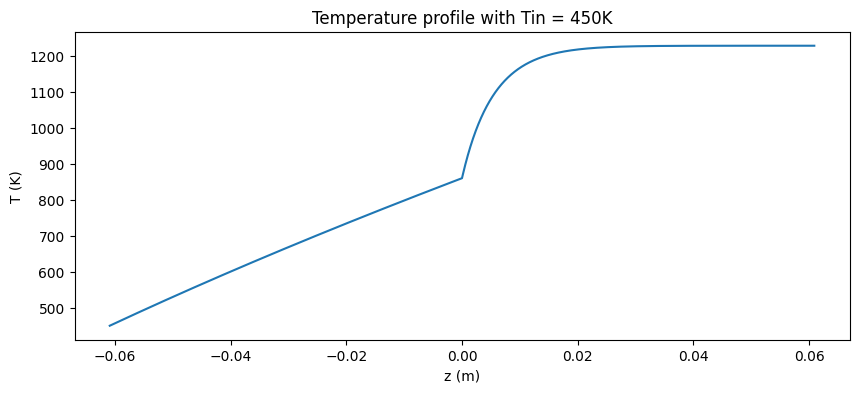

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(soln.x, soln.y[6])
plt.xlabel('z (m)')
plt.ylabel('T (K)')
plt.title(f'Temperature profile with Tin = {Tin}K')

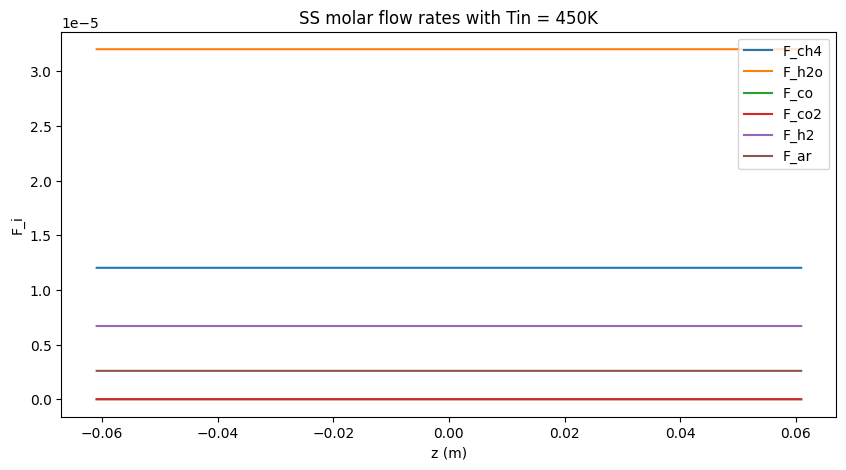

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(soln.x, soln.y[0], label='F_ch4')
plt.plot(soln.x, soln.y[1], label='F_h2o')
plt.plot(soln.x, soln.y[2], label='F_co')
plt.plot(soln.x, soln.y[3], label='F_co2')
plt.plot(soln.x, soln.y[4], label='F_h2')
plt.plot(soln.x, soln.y[5], label='F_ar')
plt.xlabel('z (m)')
plt.ylabel('F_i')
plt.title(f'SS molar flow rates with Tin = {Tin}K')
plt.legend()

In [20]:
mf = np.dot(MM, soln.y[:6,-1])

print(f'{m0:.4e}')
print(f'{mf:.4e}')
print(f'mass balance off by {abs(mf - m0)/mf *100:.2}%')

8.8701e-04
8.8701e-04
mass balance off by 4.1e-12%


In [21]:
#Enthalpy balance based on heats of formation
_, _, _, heatsin = heats(soln.y[6,0])
_, _, _, heatsout = heats(soln.y[6,-1])
print(soln.x[int(x_num/2 -1)])

Qarray = Uouter*(-soln.y[6,int(x_num/2):]+Ts)*Perimout*dz + q_furn*Perimout*dz #Uinner*(-soln.y[6,int(x_num/2):] + soln.y[6,:int(x_num/2)][::-1]) - Perimout*dz*0.005*210.1*10**3 - Perimout*dz*0.005*(-40.15)*10**3
print(len(Qarray))
Q = np.sum(Qarray)

#[dH_CH4, dH_H2O, dH_CO, dH_CO2, dH_H2, dH_Ar] # kJ/mol
# print((heatsin + np.array([-74.5, -241.8, -110.5, -393.52, 0, 0]))*soln.y[:6,0]*10**3)
# print((heatsout + np.array([-74.5, -241.8, -110.5, -393.52, 0, 0]))*soln.y[:6,-1]*10**3)
Hin = np.sum((heatsin + np.array([-74.5, -241.8, -110.5, -393.52, 0, 0]))*10**3 *soln.y[:6,0])
Hout = np.sum((heatsout + np.array([-74.5, -241.8, -110.5, -393.52, 0, 0]))*10**3 *soln.y[:6,-1])

print(Q/Souter)

dH = Hout-Hin
print(f'dH = {dH:.3} W')
print(f'Q = {Q:.3} W')
print(f'heat balance off by {abs(dH - Q)/Q *100:.4}%')

-6.090609060906138e-06
5000
56.64656020488533
dH = 1.77 W
Q = 0.0759 W
heat balance off by 2.238e+03%


Text(0.5, 1.0, 'Velocity profile along reactor')

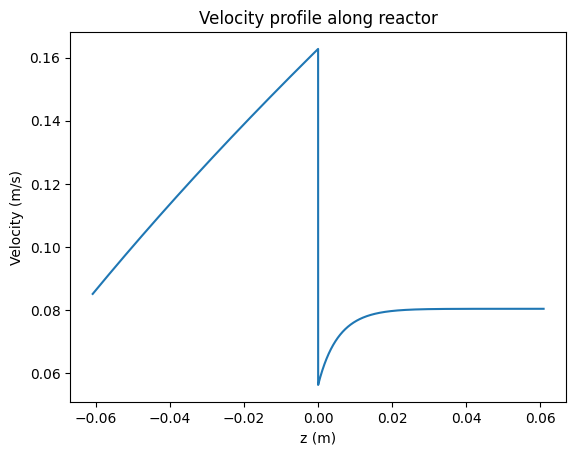

In [22]:
v = np.concatenate([vfinal[0], vfinal[1]])
plt.plot(soln.x[:len(v)], v)
plt.xlabel('z (m)')
plt.ylabel('Velocity (m/s)')
plt.title(f'Velocity profile along reactor')

9999
10000


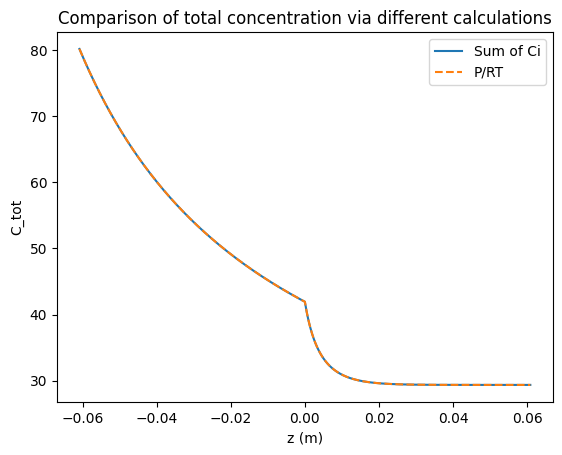

In [23]:
u = np.concatenate([vfinal[0]*Ain, vfinal[1]*A]) #this part is a little ugly but whatever
print(len(u))
print(len(soln.y[0]))
Csum = np.sum(soln.y[:6,:len(u)], axis = 0)/u

T = soln.y[6]
plt.plot(soln.x[:len(Csum)], Csum, label='Sum of Ci')
plt.plot(soln.x, P/(Rgas * T), label='P/RT', linestyle='--')
plt.xlabel('z (m)')
plt.ylabel('C_tot')
plt.title(f'Comparison of total concentration via different calculations')
plt.legend()

In [24]:
#heat balance with the absolute enthalpy
_, _, _, heatsin = heats(soln.y[6,0]) #kJ/mol
_, _, _, heatsout = heats(soln.y[6,-1]) #kJ/mol

#[dH_CH4, dH_H2O, dH_CO, dH_CO2, dH_H2, dH_Ar] # kJ/mol
print(heatsin + np.array([9.857, 9.904, 8.669, 9.364, 8.393, 0]))
Hin = np.sum((heatsin + np.array([9.857, 9.904, 8.669, 9.364, 8.393, 0]))*10**3 *soln.y[:6,0])
Hout = np.sum((heatsout + np.array([9.857, 9.904, 8.669, 9.364, 8.393, 0]))*10**3 *soln.y[:6,-1])
dH = Hout-Hin
print(dH) #W

print(f'{dH:.3} W')
print(f'{Q:.3} W')
print(f'heat balance off by {abs(dH - Q)/Q *100:.4}%')

[15.8138914  15.08042914 13.11446605 15.47713522 12.81263373  3.15635011]
1.773534474651181
1.77 W
0.0759 W
heat balance off by 2.238e+03%


In [25]:
#calculating the approximate overall heat transfer coeff
Tinmid = soln.y[6,50]
print(Tinmid)
Ctotin = P/(Rgas * Tinmid)
print(Ctotin)
dHsmr, dHwgs, Cps, _ = heats(Tinmid)
yin = soln.y[:6,50]/np.sum(soln.y[:6,50])
Cpg = np.sum(yin*Cps)
print(Cpg)
hi = Ctotin*Cpg*0.12
print(Ctotin*Cpg*0.12)

Toutmid = soln.y[6,150]
print(Toutmid)
Ctotout = P/(Rgas * Toutmid)
print(Ctotout)
dHsmr, dHwgs, Cps, _ = heats(Toutmid)
yout = soln.y[:6,150]/np.sum(soln.y[:6,150])
Cpg = np.sum(yout*Cps)
print(Cpg)
ho = Ctotout*Cpg*0.17
print(Ctotout*Cpg*0.17)

k = 71.8
ro  = 0.00225
ri = 0.003154/2

unUA = 1/(hi*2*np.pi*L*ri) + (np.log(ro/ri)/(2*np.pi*L*k)) + 1/(ho*2*np.pi*L*ro)
UA = 1/unUA
print(UA)
print(UA/Sinner)

print(0.2/Souter)

454.56664355840576
79.37608105187198
35.39194118539986
337.1128310538462
463.66611114962984
77.81832201000663
35.5673180282016
470.524131249654
0.13518473497578867
157.0174698191177
149.33609485516806


182.47861648358622


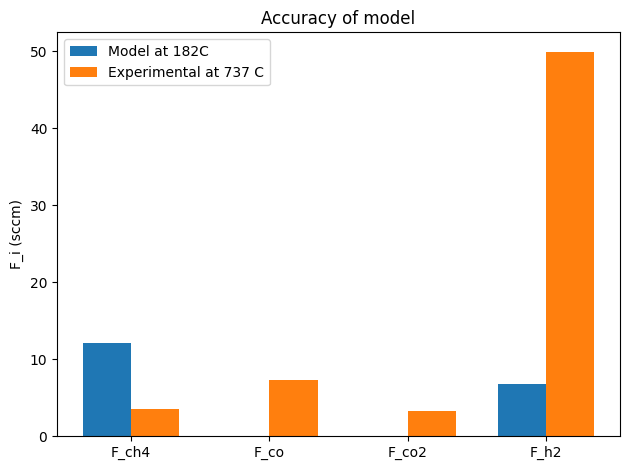

In [26]:
Tmid = soln.y[6,60]-273
print(Tmid)

# Define categories
Cexp = [3.492847043, 7.305258501, 3.329101979, 49.97503291] #this is in flowrate sccm

categories = ['F_ch4', 'F_co', 'F_co2', 'F_h2']
x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

scale = 2
#molar flowrates
CH4 = soln.y[0,-1] * (soln.y[6,-1])/273 * 1/P / (7.4358 * 10**-7) / scale
CO = soln.y[2,-1] * (soln.y[6,-1])/273 * 1/P / (7.4358 * 10**-7) / scale
CO2 = soln.y[3,-1] * (soln.y[6,-1])/273 * 1/P / (7.4358 * 10**-7) / scale
H2 = soln.y[4,-1] * (soln.y[6,-1])/273 * 1/P / (7.4358 * 10**-7) / scale

# Plot
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, [CH4, CO, CO2, H2], width, label=f'Model at {int(Tmid)}C')
bars2 = ax.bar(x + width/2, Cexp, width, label='Experimental at 737 C')

# Labels and legend
ax.set_ylabel('F_i (sccm)')
ax.set_title(f'Accuracy of model')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()